## Fitting, Linear Fitting, Linear Regression

In [1]:
# First, load any modules you need here.

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as colors

import scipy.optimize as optimize


## Curve fitting using Least Square Method.

### A lot of time we have data that we know should fit a certain function, but we don't know the parameter of the function.

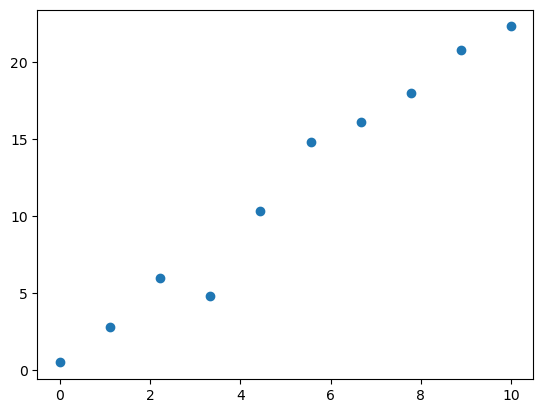

In [2]:
# Make some x and y data

x = np.linspace(0,10,10)
y = np.array([0.5, 2.8, 6.0 , 4.8, 10.3, 14.8, 16.1, 18.0,20.8, 22.3])


# Plot the data

plt.plot(x,y,"o")
plt.show()


<h3>

This looks pretty linear.
    
Let's start with the simpliest function, a straight line.

f(x) = mx + b

Our task is to determine what m and b fit.

We start the process by guessing...

Let's make m = 1, b =1

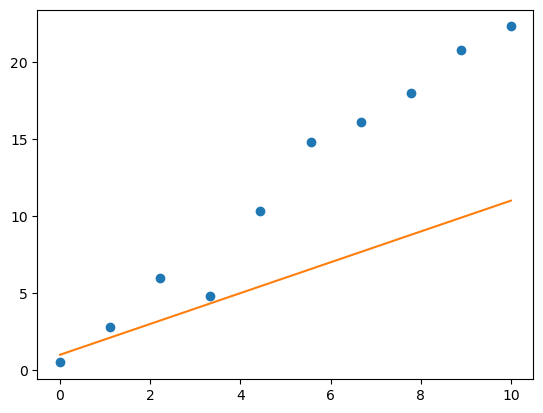

In [3]:
# First, define a function to return y values given x, m, and b:

def f(x,m,b):
    return m*x+b


# Now make an initial fit:

m = 1.0
b = 1.0

fit = f(x,m,b)   # Fitted y values


# Plot data and line:

plt.plot(x,y, "o")
plt.plot(x,fit)
plt.show()


<h3>

If we just use an absolute value, any line that stays between those two point have the same total $\delta$, so still bad.
    
We can fix this by squaring $\delta$.  This means poitns far away from the line are considered much worse than points close to the line.

$\delta^2 =  (f(x) - y[x])^2$

Since each point contributes to the "error" we're making, we can sum all these $\delta$s up. This is the $\chi^2$,

$\chi^2 = \sum_{i=1}^{N} (f(x_i) - y[i])^2$

Let's calculate the chi-squared for our line:


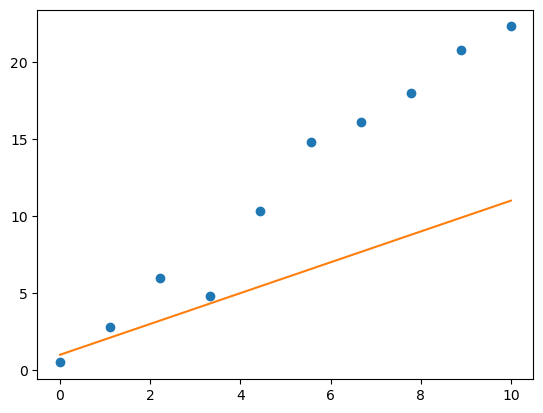

f(x)-y[x] =  [  0.5         -0.68888889  -2.77777778  -0.46666667  -4.85555556
  -8.24444444  -8.43333333  -9.22222222 -10.91111111 -11.3       ]
chisqr =  503.11851851851856


In [4]:
# Plot the data and line again

fit = f(x,m,b)   # Fitted y values


plt.plot(x,y, "o")
plt.plot(x,fit)
plt.show()


chisqr = np.sum( ( fit - y )**2 )

print('f(x)-y[x] = ',fit-y)
print('chisqr = ',chisqr)

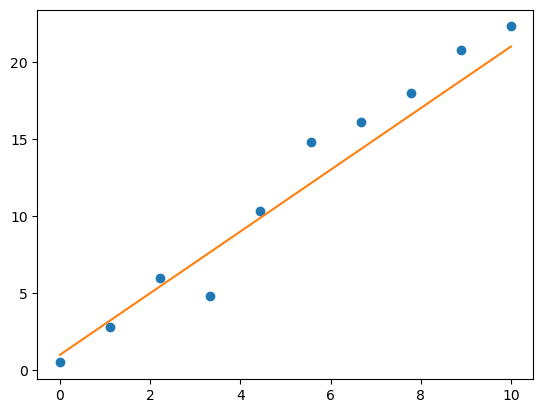

chisqr =  27.34074074074075


In [23]:
# Let's try a different m and b:

m = 2.0
b = 1.0

fit = f(x,m,b)

# plot data and new line

plt.plot(x,y, "o")
plt.plot(x,fit)
plt.show()


chisqr = np.sum( ( fit - y )**2 )

print('chisqr = ',chisqr)


## Chi-squared fitting

<h3>

We want to make the fit better by getting a smaller $\chi^2$, but how can we see if it's the minimal number?

For a line, we can do this analytically using some calculus:

Something is a minimum when the derivative is zero.  A line has two parameters, m and b, so minimum $\chi^2$ will be when 

both derivatives are zero: 

$\frac{\partial \chi^2}{\partial m} = 0$ and $\frac{\partial \chi^2}{\partial b} = 0$


<br>

We can write $\chi^2$ in terms of x, y, m and b:

$\chi^2 (m,b) = \sum_{i=1}^{N} (mx[i]+b - y[i])^2$

Taking the derivative of $\chi^2$ with respect to m, but let's rewrite the function first to make it easier.

$\chi^2 = \sum_{i=1}^{N} (m^2 x[i]^2+b^2 + y[i]^2+2mx[i]b-2mx[i]y[i]-2by[i])$

$\frac{\partial}{\partial m} \chi^2 = \sum_{i=1}^{N} (2mx[i]^2+2x[i]b-2x[i]y[i])$

Setting this equal to zero should give us the max or min of the function....

$\sum_{i=1}^{N} 2mx[i]^2+\sum_{i=1}^{N}2x[i]b-\sum_{i=1}^{N}2x[i]y[i] = 0$

$2m\sum_{i=1}^{N} x[i]^2+2b\sum_{i=1}^{N}x[i]-2\sum_{i=1}^{N}x[i]y[i] = 0$ (eq 1)

Doing the same by differentiating with b,

$\sum_{i=1}^{N} 2mx[i]+\sum_{i=1}^{N}2b-\sum_{i=1}^{N}2y[i] = 0$

$2m \sum_{i=1}^{N} x[i]+2Nb-2\sum_{i=1}^{N}y[i] = 0$ (eq 2)

This looks crazy complicated because of the sums, but let's make it look better by declaring...

$E_x =\frac{1}{N} \sum_{i=1}^{N} x[i]$

$E_y =\frac{1}{N} \sum_{i=1}^{N} y[i]$

$E_{xx} =\frac{1}{N} \sum_{i=1}^{N}x[i]^2$

$E_{xy} =\frac{1}{N} \sum_{i=1}^{N}x[i]y[i]$

Substituting back into the  equations (1) & (2) above 

$mE_{xx}+bE_x=E_{xy}$

$mE_x+b=E_y$

Solving these equations we get,

$m = \frac{E_{xy}-E_xE_y}{E_{xx}-E_x^2}$

$b = \frac{E_{xx}E_y-E_xE_{xy}}{E_{xx}-E_x^2}$

Let's calcuate this, we should expect m ~ 2 and b ~ 1 as we saw in the previous tries...

In [5]:
# Do line fit by hand:

N = len(y)   # number of data points

Ex = np.sum(x)/N       # Sum of x[i]

Ey = np.sum(y)/N       # Sum of y[i]

Exx = np.sum(x**2)/N   # Sum of x[i]**2

Exy = np.sum(x*y)/N    # Sum of x[i] * y[i]


# Calulate m and b:

m_best = (Exy - Ex*Ey) / (Exx-Ex**2)

b_best = (Exx*Ey - Ex*Exy) / (Exx-Ex**2)

print('Best fit m and b = ',m_best, b_best)

Best fit m and b =  2.294181818181819 0.16909090909090416


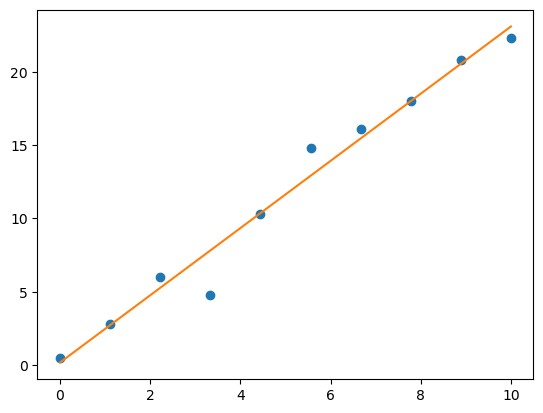

chisqr =  14.430181818181822


In [6]:
# Make a line with best fit and plot:

fit = f(x,m_best,b_best)

plt.plot(x,y, "o")
plt.plot(x,fit)
plt.show()

chisqr = np.sum((fit-y)**2)
print('chisqr = ',chisqr)

In [7]:

# Let's define a function to determine the best linear fit:

def linefit(x,y):
    N = len(y)          # number of data points
    Ex = np.sum(x)/N       # Sum of x[i]
    Ey = np.sum(y)/N       # Sum of y[i]
    Exx = np.sum(x**2)/N   # Sum of x[i]**2
    Exy = np.sum(x*y)/N    # Sum of x[i] * y[i]

    # Calulate m and b:

    m_best = (Exy -Ex*Ey)/(Exx-Ex**2)
    b_best = (Exx*Ey -Ex*Exy)/(Exx-Ex**2)

    return m_best,b_best
    
    
# Use this function to find m and b:

m,b = linefit(x,y)

print('best fit m and b = ',m,b)




best fit m and b =  2.294181818181819 0.16909090909090416


## Numerical fitting with minimization

<h3>

This is the best fit for the data with a linear function. Notice that this is really an analytical result, since we can compute $m_{best}$ and $b_{best}$ manually.

This is actually possible for all fit function that fits to a polynomial.

$f(x) = p[0]+p[1]x^1+p[2]x^2+p[3]x^3+...$

When you take the derivative with respect to p[i], you get n equations with n variables.

This is not possible if we want to this with non-polynomial functions however. So there's a numerical way to minimize $\chi^2$.

<br>
  
For example, the above isn't the only way to do a linear fit

Let's look an example using the minimize function:


In [8]:
# First, we define a function to minimize.  In this case, that will be chisqr:

def line_chi_squared(m_b,x,y):

    # We are only fitting for m and b, but we need the x and y values as extra arguments
    # m and b are passed as an array, so need to get each of them.

    m = m_b[0]
    b = m_b[1]
    
    fit = f(x,m,b)   # use out line function
    chisqr = np.sum((fit-y)**2)  # calculate chi**2
    return chisqr


# Then use scipy.optimize.minimize to find the best values of m and b:

# Make an inital guess at m and b:

p = np.array([1.0,1.0])

# Use minimize

best_fit = optimize.minimize(line_chi_squared,p,args=(x,y))

print(best_fit)

print(' ')
print(' ')


# The stuff returned is a bit complicated, but we want to extract m and b form best_fit.x:

m_best_min = best_fit.x[0]
b_best_min = best_fit.x[1]


# Print the m and b from this fit.
print('m and b from minimize = ',m_best_min,b_best_min)

# Print the origional best fit values
print('m and b from before = ',m_best,b_best)
    

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 14.430181818181893
        x: [ 2.294e+00  1.691e-01]
      nit: 4
      jac: [ 3.576e-07  0.000e+00]
 hess_inv: [[ 4.909e-03 -2.455e-02]
            [-2.455e-02  1.727e-01]]
     nfev: 18
     njev: 6
 
 
m and b from minimize =  2.294181793061695 0.1690910358106476
m and b from before =  2.294181818181819 0.16909090909090416


<h3>

This is going to be slower for a linear fit, but the advantage is we could use any function, with any number of parameters.

There's another useful function in scipy we can use, optimize.curve_fit , that will let us skip defining a function to minimize:


In [9]:

# Use scipy.optimize.curve_fit to find the best values of m and b:

# Make an inital guess at m and b:

p = np.array([1.0,1.0])


y = x**2+3

# Use curve_fit.  Here, we pass x and y values, and the array with our geuss at m and b:

popt,pcov = optimize.curve_fit(f,x,y,p)

# curve_fit returns two arrays, the parameters fits (popt) and the covarience martix (pcov)

print('popt = ',popt)
print('pcov = ',pcov)

print(' ')
print(' ')


# m and b will be the best fit paramets in popt:

m_best_curve = popt[0]
b_best_curve = popt[1]

# Print the m and b from this fit.
print('m and b from curve_fit = ',m_best_curve,b_best_curve)

# Print the origional best fit values
print('m and b from before = ',m_best,b_best)


# But we can also use the covariance matrix.  For example, we can calculate the standard deviation of each parameter:

perr = np.sqrt(np.diag(pcov))

print('perr = ',perr)

print(' ')

m_err = perr[0]
b_err = perr[1]

# Print parameters with error bars:
print('m = ',m_best_curve,'+/-',m_err)
print('b = ',b_best_curve,'+/-',b_err)



popt =  [  9.99999999 -11.81481478]
pcov =  [[ 0.98765431 -4.93827156]
 [-4.93827156 34.75079997]]
 
 
m and b from curve_fit =  9.999999993064186 -11.814814780135748
m and b from before =  2.294181818181819 0.16909090909090416
perr =  [0.99380798 5.89498091]
 
m =  9.999999993064186 +/- 0.993807984062515
b =  -11.814814780135748 +/- 5.894980913667294


## Curve fitting with error bars

### A lot of time we have data that we know should fit a certain function, but we don't know the parameter of the function.

### Up until now, we've been assuming the error on each point is the same.  Here, this isn't the case.  We also have the standard deviation of the measurement at each point (sigma).  This is the error on each measurement.

### We are assuming the errors on all data are random, gaussian, symmetric, and independent of each other.

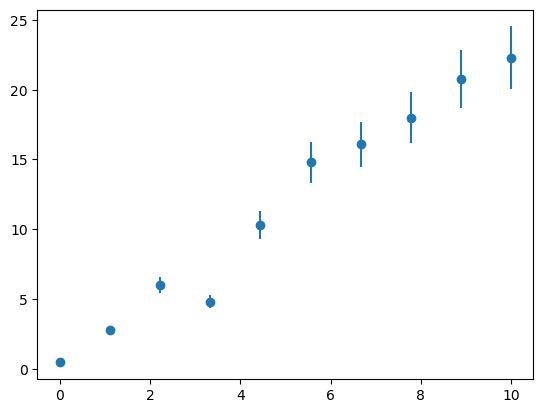

In [11]:
# Make some x and y data

x = np.linspace(0,10,10)
y = np.array([0.5, 2.8, 6.0 , 4.8, 10.3, 14.8, 16.1, 18.0,20.8, 22.3])

# Let's set sigma to 10% of the measured value of y.

sigma = y*0.1  


# Plot the data using the errorbar command:

plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.show()


<h3>
    
   
We saw before that we can define how close a fitted curve is to a data point as:

$\delta = f(x) - y[x]$

Since both positve and negative $\delta$ are bad, we should actually only consider the absolute value of it. We can do this by squaring $\delta$.  This also means far away points are much worse than nearby points.

$\delta^2 =  (f(x) - y[x])^2$

If we had no error on the measurements, since each point contributes to the "error" we're making, we can sum all these $\delta$s up. This is the $\chi^2$,

$\chi^2 = \sum_{i=1}^{N} (f(x_i) - y[i])^2$
    
    
<br>    
    
However, in this case we also have error on the measurement, sigma.  We really want to use how may sigma away from a poitn our fit is, not just how far.  We can incorporate this by weighting the contribution of each data point by $W_i = 1/\sigma[i]^2$ to give us a weighted $\chi^2$:
    
$\chi_W^2 = \sum_{i=1}^{N} W_i (f(x_i) - y[i])^2 = \sum_{i=1}^{N} (f(x_i) - y[i])^2/\sigma[i]^2 $

    

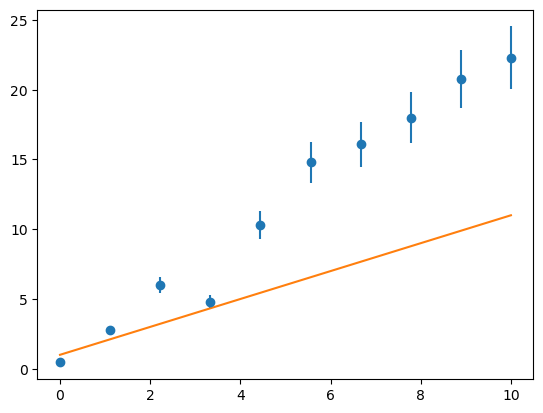

f(x)-y[x] =  [  0.5         -0.68888889  -2.77777778  -0.46666667  -4.85555556
  -8.24444444  -8.43333333  -9.22222222 -10.91111111 -11.3       ]
chisqr =  503.11851851851856
chisqr_w =  288.5684097898663


In [12]:
# Plot the data and and test fit:


def f(x,m,b):
    return m*x+b


# Now make an initial fit:

m = 1.0
b = 1.0

fit = f(x,m,b)   # Fitted y values

plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.plot(x,fit)
plt.show()

chisqr = np.sum( ( fit - y )**2 )

chisqr_w = np.sum( ( fit - y )**2/sigma**2 )

print('f(x)-y[x] = ',fit-y)
print('chisqr = ',chisqr)
print('chisqr_w = ',chisqr_w)

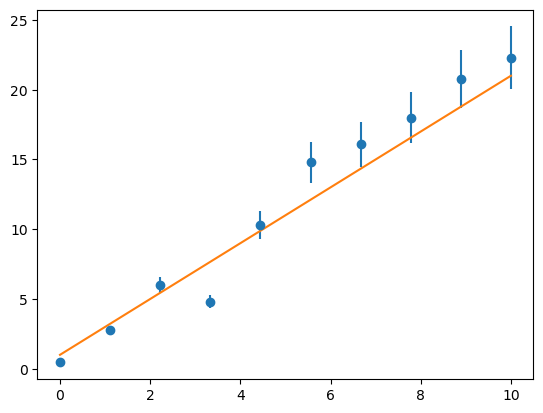

chisqr =  27.34074074074075
chisqr_w =  145.39188392118592


In [13]:
# Let's try a different m and b:

m = 2.0
b = 1.0

fit = f(x,m,b)

# plot data and new line

plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.plot(x,fit)
plt.show()


chisqr = np.sum( ( fit - y )**2 )

chisqr_w = np.sum( ( fit - y )**2/sigma**2 )


print('chisqr = ',chisqr)
print('chisqr_w = ',chisqr_w)

# Because the error is small for smaller values, this actually isn't a great fit.


<h3>

We want to make the fit better by getting a smaller weighted $\chi^2$, but how can we see if it's the minimal number?

We can go through the same math we did before to get a formula for the best fit, but carry along sigma.

Something is a minimum when the derivative is zero.  A line has two parameters, m and b, so minimum $\chi^2$ will be when 

both derivatives are zero: 

$\partial \chi^2/\partial m = 0$ and $\partial \chi^2/\partial b = 0$


<br>

We can write $\chi^2$ in terms of x, y, sigma, m and b.  This will look very much like the derivation from last time, just with a factor of $1/\sigma[i]^2$ everywhere:

$\chi^2 (m,b) = \sum_{i=1}^{N} (mx[i]+b - y[i])^2/\sigma[i]^2$

Taking the derivative of $\chi^2$ with respect to m, but let's rewrite the function first to make it easier.

$\chi^2 = \sum_{i=1}^{N} (m^2 x[i]^2+b^2 + y[i]^2+2mx[i]b-2mx[i]y[i]-2by[i])/\sigma[i]^2$

$\frac{\partial}{\partial m} \chi^2 = \sum_{i=1}^{N} (2mx[i]^2+2x[i]b-2x[i]y[i])/\sigma[i]^2$

Setting this equal to zero should give us the max or min of the function....

$\sum_{i=1}^{N} 2mx[i]^2/\sigma[i]^2 + \sum_{i=1}^{N}2x[i]b/\sigma[i]^2 - \sum_{i=1}^{N}2x[i]y[i]/\sigma[i]^2 = 0$

$2m\sum_{i=1}^{N} x[i]^2/\sigma[i]^2 + 2b\sum_{i=1}^{N}x[i]/\sigma[i]^2 - 2\sum_{i=1}^{N}x[i]y[i]/\sigma[i]^2 = 0$ (eq 1)

Doing the same by differentiating with b,

$\sum_{i=1}^{N} 2mx[i]/\sigma[i]^2 + \sum_{i=1}^{N}2b/\sigma[i]^2 - \sum_{i=1}^{N}2y[i]/\sigma[i]^2 = 0$

$2m \sum_{i=1}^{N} x[i]/\sigma[i]^2 + 2b \sum_{i=1}^{N}1/\sigma[i]^2 - 2\sum_{i=1}^{N}y[i]/\sigma[i]^2 = 0$ (eq 2)

This looks crazy complicated because of the sums, but let's make it look better by declaring...

$E_x =\frac{1}{N} \sum_{i=1}^{N} x[i]/\sigma[i]^2$

$E_y =\frac{1}{N} \sum_{i=1}^{N} y[i]/\sigma[i]^2$

$E_{xx} =\frac{1}{N} \sum_{i=1}^{N}x[i]^2/\sigma[i]^2$

$E_{xy} =\frac{1}{N} \sum_{i=1}^{N}x[i]y[i]/\sigma[i]^2$

$E_{\sigma} = \frac{1}{N} \sum_{i=1}^{N}1/\sigma[i]^2$

Substituting back into the  equations (1) & (2) above 

$mE_{xx}+bE_x=E_{xy}$

$mE_x+bE_{\sigma}=E_y$

Solving these equations we get,

$m = \frac{E_{xy}E_{\sigma}-E_xE_y}{E_{xx}E_{\sigma}-E_x^2}$

$b = \frac{E_{xx}E_y-E_xE_{xy}}{E_{xx}E_{\sigma}-E_x^2}$

Let's calcuate this, we should expect m ~ 2 and b ~ 1 as we saw in the previous tries...

In [14]:
# Do line fit by hand:

N = len(y)   # number of data points

Ex = np.sum(x/sigma**2)/N       # Sum of x[i]

Ey = np.sum(y/sigma**2)/N       # Sum of y[i]

Exx = np.sum(x**2/sigma**2)/N   # Sum of x[i]**2

Exy = np.sum(x*y/sigma**2)/N    # Sum of x[i] * y[i]

Esigma = np.sum(1/sigma**2)/N    # Sum of 1/sigma[i]**2

print(Esigma)

# Calulate m and b:

m_best = (Exy*Esigma -Ex*Ey)/(Exx*Esigma-Ex**2)

b_best = (Exx*Ey -Ex*Exy)/(Exx*Esigma-Ex**2)

print('Best fit m and b = ',m_best, b_best)

42.239894964542145
Best fit m and b =  2.0267480147835273 0.49297713018843925


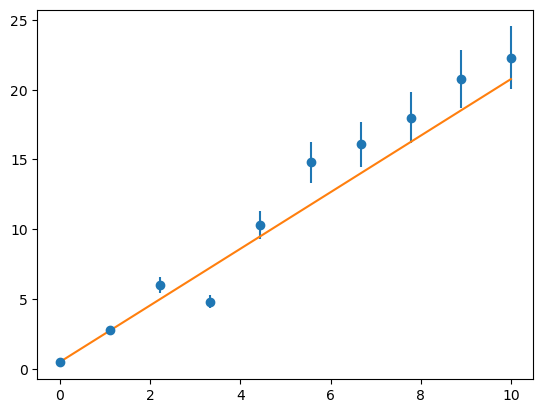

chisqr =  31.98213198125413
chisqr_w =  38.04461359448019


In [15]:
# Make a line with best fit and plot:

fit = f(x,m_best,b_best)

plt.errorbar(x,y,sigma,marker='o',linestyle='')
plt.plot(x,fit)
plt.show()

chisqr = np.sum((fit-y)**2)
chisqr_w = np.sum((fit-y)**2/sigma**2)

print('chisqr = ',chisqr)
print('chisqr_w = ',chisqr_w)

In [16]:

# Let's define a function to determine the best linear fit:

def linefit(x,y,sigma):
    N = len(y)          # number of data points
    Ex = np.sum(x/sigma**2)/N       # Sum of x[i]
    Ey = np.sum(y/sigma**2)/N       # Sum of y[i]
    Exx = np.sum(x**2/sigma**2)/N   # Sum of x[i]**2
    Exy = np.sum(x*y/sigma**2)/N    # Sum of x[i] * y[i]
    Esigma = np.sum(1/sigma**2)/N    # Sum of 1/sigma[i]**2

    # Calulate m and b:

    m_best = (Exy*Esigma -Ex*Ey)/(Exx*Esigma-Ex**2)
    b_best = (Exx*Ey -Ex*Exy)/(Exx*Esigma-Ex**2)

    return m_best,b_best
    
    
# Use this function to find m and b:

m,b = linefit(x,y,sigma)

print('best fit m and b = ',m,b)




best fit m and b =  2.0267480147835273 0.49297713018843925


best fit m and b with sigma2 =  2.065493927628421 2.077573293389787
chisqr =  25.609752245934168
chisqr_w =  41.85494352843852


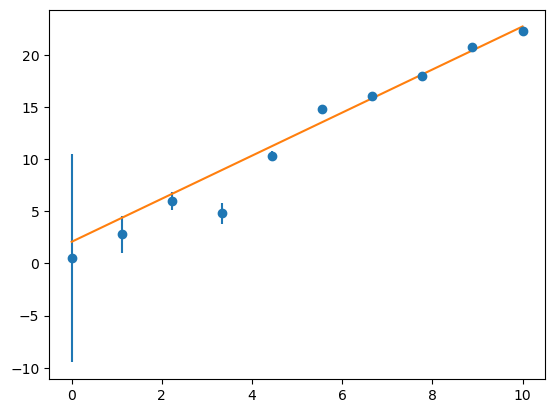

best fit m and b with sigma3 =  2.2941818181818174 0.1690909090909201
chisqr =  14.430181818181822
chisqr_w =  0.5772072727272728


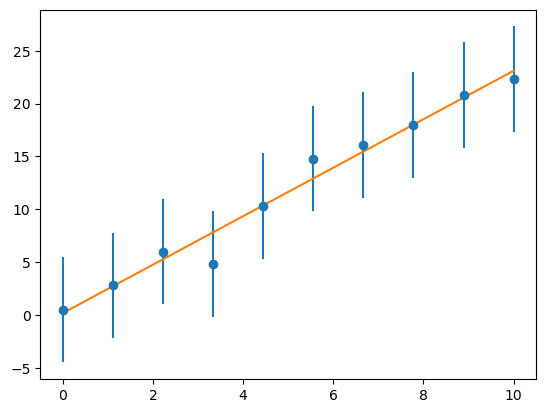

In [17]:
# Let's try some other sigma's to see how the slope would change:

sigma2 = 1/y*5

m2,b2 = linefit(x,y,sigma2)

print('best fit m and b with sigma2 = ',m2,b2)

fit2 = f(x,m2,b2)

chisqr = np.sum((fit2-y)**2)
chisqr_w = np.sum((fit2-y)**2/sigma2**2)

print('chisqr = ',chisqr)
print('chisqr_w = ',chisqr_w)


plt.errorbar(x,y,sigma2,marker='o',linestyle='')
plt.plot(x,fit2)
plt.show()


sigma3 = y*1.
sigma3[:]=5   # This is the same error on each point.

m3,b3 = linefit(x,y,sigma3)

 # We get the same fit as unweighted data, even though the chi^2 is differnet

print('best fit m and b with sigma3 = ',m3,b3)   

fit3 = f(x,m3,b3)

chisqr = np.sum((fit3-y)**2)
chisqr_w = np.sum((fit3-y)**2/sigma3**2)

print('chisqr = ',chisqr)
print('chisqr_w = ',chisqr_w)


plt.errorbar(x,y,sigma3,marker='o',linestyle='')
plt.plot(x,fit3)
plt.show()



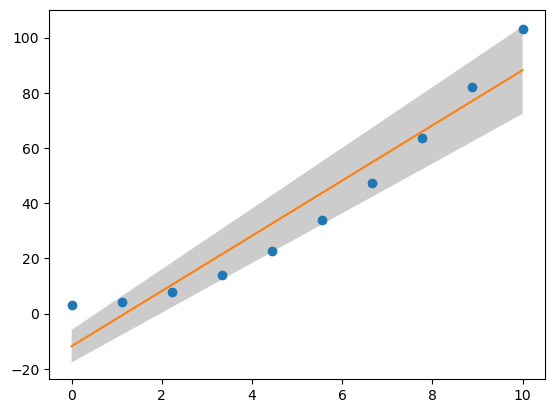

In [10]:
# Plot the best fit, along with the 1-sigma error region:

fit = f(x,m_best_curve,b_best_curve)  # best fit line

y1 = f(x,m_best_curve+m_err,b_best_curve+b_err)  # values plus 1-sigma

y2 = f(x,m_best_curve-m_err,b_best_curve-b_err)  # values minus 1-sigma

plt.plot(x,y, "o")
plt.plot(x,fit)
#plt.plot(x,y1)
#plt.plot(x,y2)
plt.fill_between(x,y2,y1, facecolor="gray", alpha=0.4)
plt.show()
